# Zomato prediction

Problem='''The basic idea of analysing the Zomato dataset is to get a fair idea about the factors affecting the
aggregate rating of each restaurant, establishment of different types of restaurant at different
places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving
dishes from all over the world. With each day new restaurants opening the industry hasn’t been
saturated yet and the demand is increasing day by day. In spite of increasing demand it however
has become difficult for new restaurants to compete with established restaurants. Most of them
serving the same food. Bengaluru being an IT capital of India. Most of the people here are
dependent mainly on the restaurant food as they don&#39;t have time to cook for themselves. With
such an overwhelming demand of restaurants it has therefore become important to study the
demography of a location. Hence build a model to predict the rating of the each restaurants.'''


In [1]:
#Importing required libaries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
dataset=pd.read_excel('C:/Users/Admin/Desktop/Practisse/zomato.xlsx')

In [3]:
dataset.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


# Understanding Dataset

In [4]:
dataset.tail()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
41368,https://www.zomato.com/bangalore/koshys-st-mar...,"39, St. Marks Road, Bangalore",Koshy's,No,No,2332,080 22915840\n080 22213793,St. Marks Road,Casual Dining,"Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...","South Indian, North Indian, Chinese, Beverages",700,"[('Rated 4.0', 'RATED\n A place where you get...",[],Dine-out,Residency Road,3.8
41369,https://www.zomato.com/bangalore/midnight-spec...,"521, 2nd Floor, Teachers Colony, Sarjapura Rin...",Midnight Special,Yes,No,0,+91 80420780493,HSR,"Takeaway, Delivery",NaN,"North Indian, Fast Food, Chinese",500,[],[],Delivery,Koramangala 4th Block,NaN
41370,https://www.zomato.com/bangalore/sholay-the-ba...,"1, RMV 2nd Stage, 3rd Block, Chikkamaranahalli...",Sholay - The Barbeque,Yes,Yes,45,+91 7619328882,New BEL Road,Casual Dining,NaN,"North Indian, BBQ","1,200","[('Rated 2.0', 'RATED\n That building homes t...",[],Dine-out,New BEL Road,3.5
41371,https://www.zomato.com/bangalore/ghar-ka-bhoja...,"93, 1st Floor, Opoosite Venkateshwara Temple, ...",Ghar Ka Bhojan,No,No,7,+91 9945810850\n+91 9997888609,Domlur,Delivery,NaN,"North Indian, Healthy Food",200,"[('Rated 1.0', 'RATED\n Food not upto the mar...",[],Delivery,MG Road,3.3
41372,https://www.zomato.com/bangalore/sree-sagar-ba...,"8, Yarab Nagar Main Road, 2nd Stage, Banashank...",Sree Sagar,Yes,No,0,+91 9449150005,Banashankari,Quick Bites,NaN,South Indian,200,"[('Rated 3.5', ""RATED\n Visited this restaura...",[],Dine-out,Basavanagudi,NaN


In [5]:
dataset.shape

(41373, 17)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
votes,41373.0,283.771493,806.112459,0.0,7.0,41.0,200.0,16832.0


In [8]:
dataset.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [9]:
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

# Data Preprocessing

In [10]:
dataset.isnull().values.any()

True

In [11]:
dataset.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

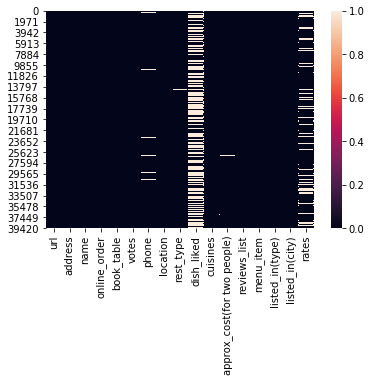

In [12]:
sns.heatmap(dataset.isnull())

In [13]:
## from the heatmap visualtion we can see that there are more than 50% of null values we need to fix that
# now i am gonna drop unnecessry columns which doesn't play an important role to build our model i.e url,phone,dishliked

In [104]:
# No of restaurants in locations wise

dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

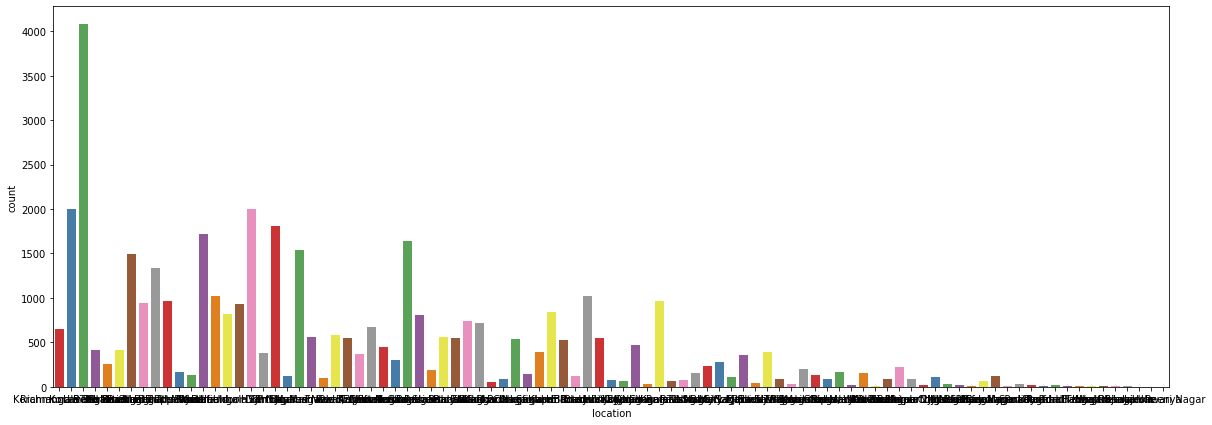

In [106]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=dataset, palette = "Set1")

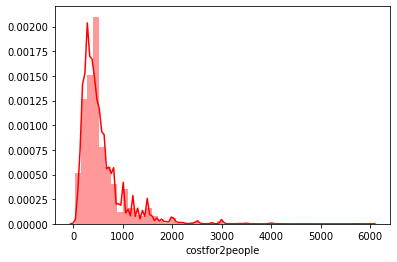

In [110]:
sns.distplot(dataset1['costfor2people'],color="red")

(array([4.0000e+00, 2.8000e+01, 2.0000e+01, 8.9000e+01, 8.0000e+01,
        4.3200e+02, 4.7600e+02, 1.4450e+03, 1.2510e+03, 3.2800e+03,
        4.2390e+03, 2.6420e+03, 1.4044e+04, 3.1830e+03, 4.8880e+03,
        1.7470e+03, 2.2820e+03, 5.1600e+02, 3.7500e+02, 1.0400e+02]),
 array([1.8  , 1.955, 2.11 , 2.265, 2.42 , 2.575, 2.73 , 2.885, 3.04 ,
        3.195, 3.35 , 3.505, 3.66 , 3.815, 3.97 , 4.125, 4.28 , 4.435,
        4.59 , 4.745, 4.9  ]),
 <a list of 20 Patch objects>)

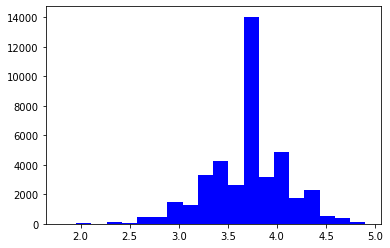

In [114]:
rating = dataset1['rates']
plt.hist(rating,bins=20,color="blue")

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [16]:
# i am going to save that in another dataset

In [17]:
dataset1=dataset.drop(axis=1,columns=['url','dish_liked','phone','reviews_list'])

In [18]:
dataset1.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [19]:
dataset1.rename({'approx_cost(for two people)':'costfor2people','listed_in(type)':'listtype','listed_in(city)':'citylist'},inplace=True,axis=1)

In [20]:
dataset1.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'costfor2people', 'menu_item', 'listtype',
       'citylist', 'rates'],
      dtype='object')

In [21]:
dataset1.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2people,menu_item,listtype,citylist,rates
0,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,Richmond Road,Quick Bites,"North Indian, South Indian, Arabian",350,"['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","European, Continental","1,800",[],Dine-out,Koramangala 6th Block,4.6
2,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,BTM,Quick Bites,Kerala,250,[],Dine-out,Koramangala 4th Block,3.4
3,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,Lavelle Road,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos","1,500",[],Dine-out,Residency Road,4.3
4,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,Koramangala 8th Block,Beverage Shop,"Juices, Fast Food",150,"['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [22]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 13 columns):
address           41373 non-null object
name              41373 non-null object
online_order      41373 non-null object
book_table        41373 non-null object
votes             41373 non-null int64
location          41358 non-null object
rest_type         41198 non-null object
cuisines          41341 non-null object
costfor2people    41094 non-null object
menu_item         41373 non-null object
listtype          41373 non-null object
citylist          41373 non-null object
rates             33392 non-null object
dtypes: int64(1), object(12)
memory usage: 4.1+ MB


In [23]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
dataset1['costfor2people']=dataset1['costfor2people'].apply(remove_comma)


In [24]:
remove_comma

<function __main__.<lambda>(x)>

In [25]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 13 columns):
address           41373 non-null object
name              41373 non-null object
online_order      41373 non-null object
book_table        41373 non-null object
votes             41373 non-null int64
location          41358 non-null object
rest_type         41198 non-null object
cuisines          41341 non-null object
costfor2people    41094 non-null float64
menu_item         41373 non-null object
listtype          41373 non-null object
citylist          41373 non-null object
rates             33392 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 4.1+ MB


In [26]:
dataset1['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', nan, '3.2 ', '3.3 ', '2.9', '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '3.3', '2.6', '4.0', '2.8',
       '-', '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

In [27]:
dataset1=dataset1.loc[dataset1.rates!='-'].reset_index(drop=True)

In [28]:
dataset1['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', nan, '3.2 ', '3.3 ', '2.9', '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '3.3', '2.6', '4.0', '2.8',
       '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

In [29]:
dataset1['rates'].head(10)

0    3.1 
1    4.6 
2    3.4 
3    4.3 
4    3.7 
5     3.0
6    3.1 
7    3.9 
8     4.1
9     3.6
Name: rates, dtype: object

In [30]:
dataset1['rates']=dataset1['rates'].astype('float')

In [31]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41317 entries, 0 to 41316
Data columns (total 13 columns):
address           41317 non-null object
name              41317 non-null object
online_order      41317 non-null object
book_table        41317 non-null object
votes             41317 non-null int64
location          41302 non-null object
rest_type         41142 non-null object
cuisines          41285 non-null object
costfor2people    41042 non-null float64
menu_item         41317 non-null object
listtype          41317 non-null object
citylist          41317 non-null object
rates             33336 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


In [32]:
dataset1['rates']=dataset1['rates'].fillna(dataset1['rates'].mean())

In [33]:
dataset1['rates'].unique()

array([3.1       , 4.6       , 3.4       , 4.3       , 3.7       ,
       3.        , 3.9       , 4.1       , 3.6       , 3.8       ,
       3.2       , 3.70096592, 3.3       , 2.9       , 4.4       ,
       4.2       , 4.        , 3.5       , 2.7       , 4.5       ,
       4.7       , 2.8       , 2.2       , 2.6       , 2.5       ,
       2.3       , 4.8       , 2.4       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [34]:
dataset1['costfor2people'].unique()

array([ 350., 1800.,  250., 1500.,  150., 1000.,  450., 2500.,  700.,
        600.,  400.,  300.,  500.,  650.,  800.,  200.,  100., 3500.,
         nan,  550., 1200.,  950., 2100., 1700., 1600.,  750., 2000.,
        850., 2200., 1300.,  900., 1100.,  330., 3000.,  199., 4000.,
       2600.,   80., 1400.,  230.,  140.,  180.,   40., 1900., 2400.,
       2800.,  130., 1050.,   50.,  120.,  360., 1450., 1250., 1350.,
       6000.,   70., 4500., 4100.,  160., 2300., 5000., 3200., 3700.,
       1650., 3400.,  240., 2700.,  190.,   60.])

In [35]:
dataset1['costfor2people']=dataset1['costfor2people'].fillna(dataset1['costfor2people'].mean())

In [36]:
dataset1['costfor2people'].unique()

array([ 350.        , 1800.        ,  250.        , 1500.        ,
        150.        , 1000.        ,  450.        , 2500.        ,
        700.        ,  600.        ,  400.        ,  300.        ,
        500.        ,  650.        ,  800.        ,  200.        ,
        100.        , 3500.        ,  554.79596511,  550.        ,
       1200.        ,  950.        , 2100.        , 1700.        ,
       1600.        ,  750.        , 2000.        ,  850.        ,
       2200.        , 1300.        ,  900.        , 1100.        ,
        330.        , 3000.        ,  199.        , 4000.        ,
       2600.        ,   80.        , 1400.        ,  230.        ,
        140.        ,  180.        ,   40.        , 1900.        ,
       2400.        , 2800.        ,  130.        , 1050.        ,
         50.        ,  120.        ,  360.        , 1450.        ,
       1250.        , 1350.        , 6000.        ,   70.        ,
       4500.        , 4100.        ,  160.        , 2300.     

In [37]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41317 entries, 0 to 41316
Data columns (total 13 columns):
address           41317 non-null object
name              41317 non-null object
online_order      41317 non-null object
book_table        41317 non-null object
votes             41317 non-null int64
location          41302 non-null object
rest_type         41142 non-null object
cuisines          41285 non-null object
costfor2people    41317 non-null float64
menu_item         41317 non-null object
listtype          41317 non-null object
citylist          41317 non-null object
rates             41317 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


In [38]:
dataset1.isnull().sum()

address             0
name                0
online_order        0
book_table          0
votes               0
location           15
rest_type         175
cuisines           32
costfor2people      0
menu_item           0
listtype            0
citylist            0
rates               0
dtype: int64

In [39]:
dataset1.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2people,menu_item,listtype,citylist,rates
0,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,Richmond Road,Quick Bites,"North Indian, South Indian, Arabian",350.0,"['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","European, Continental",1800.0,[],Dine-out,Koramangala 6th Block,4.6
2,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,BTM,Quick Bites,Kerala,250.0,[],Dine-out,Koramangala 4th Block,3.4
3,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,Lavelle Road,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos",1500.0,[],Dine-out,Residency Road,4.3
4,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,Koramangala 8th Block,Beverage Shop,"Juices, Fast Food",150.0,"['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


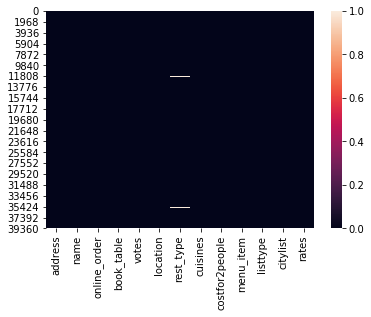

In [40]:
sns.heatmap(dataset1.isnull())

In [41]:
dataset1.dropna(how='any',inplace=True)

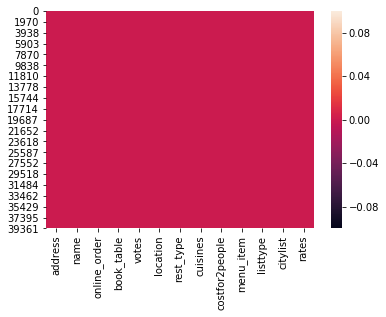

In [42]:
sns.heatmap(dataset1.isnull())

In [43]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41125 entries, 0 to 41316
Data columns (total 13 columns):
address           41125 non-null object
name              41125 non-null object
online_order      41125 non-null object
book_table        41125 non-null object
votes             41125 non-null int64
location          41125 non-null object
rest_type         41125 non-null object
cuisines          41125 non-null object
costfor2people    41125 non-null float64
menu_item         41125 non-null object
listtype          41125 non-null object
citylist          41125 non-null object
rates             41125 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 4.4+ MB


In [44]:
dataset1.isnull().sum()

address           0
name              0
online_order      0
book_table        0
votes             0
location          0
rest_type         0
cuisines          0
costfor2people    0
menu_item         0
listtype          0
citylist          0
rates             0
dtype: int64

In [45]:
dataset1.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'costfor2people', 'menu_item', 'listtype',
       'citylist', 'rates'],
      dtype='object')

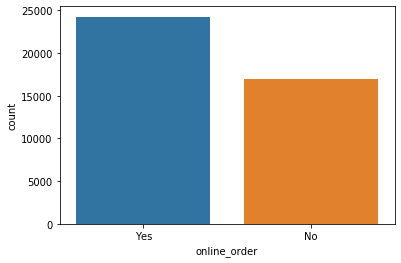

In [46]:
sns.countplot(dataset1.online_order)

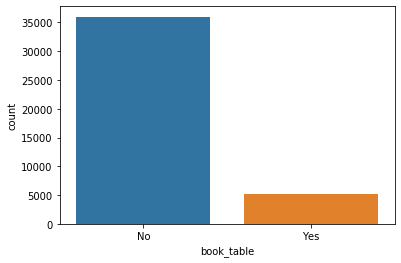

In [47]:
sns.countplot(dataset1.book_table)

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [49]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41125 entries, 0 to 41316
Data columns (total 13 columns):
address           41125 non-null object
name              41125 non-null object
online_order      41125 non-null object
book_table        41125 non-null object
votes             41125 non-null int64
location          41125 non-null object
rest_type         41125 non-null object
cuisines          41125 non-null object
costfor2people    41125 non-null float64
menu_item         41125 non-null object
listtype          41125 non-null object
citylist          41125 non-null object
rates             41125 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


In [50]:
dataset1['book_table']=encoder.fit_transform(dataset1['book_table'])

In [51]:
dataset1['location']=encoder.fit_transform(dataset1['location'])

In [52]:
dataset1['citylist']  =encoder.fit_transform(dataset1['citylist'])

In [53]:
dataset1['listtype'] =encoder.fit_transform(dataset1['listtype'])

In [54]:
dataset1['cuisines'] =encoder.fit_transform(dataset1['cuisines'])

In [55]:
dataset1['rest_type']=encoder.fit_transform(dataset1['rest_type'])

In [56]:
dataset1['online_order']=encoder.fit_transform(dataset1['online_order'])

In [57]:
dataset1['address']=encoder.fit_transform(dataset1['address'])

In [58]:
dataset1['name']=encoder.fit_transform(dataset1['name'])

In [59]:
dataset1['menu_item']=encoder.fit_transform(dataset1['menu_item'])

In [60]:
dataset1.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2people,menu_item,listtype,citylist,rates
0,2125,271,1,0,13,71,78,2154,350.0,700,2,27,3.1
1,3665,7456,0,1,5015,45,33,1209,1800.0,7626,4,18,4.6
2,3529,781,0,0,6,0,78,1580,250.0,7626,4,16,3.4
3,2734,7001,0,0,699,51,27,2615,1500.0,7626,4,27,4.3
4,5684,6861,1,0,129,48,14,1552,150.0,3027,2,18,3.7


In [61]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41125 entries, 0 to 41316
Data columns (total 13 columns):
address           41125 non-null int32
name              41125 non-null int32
online_order      41125 non-null int32
book_table        41125 non-null int32
votes             41125 non-null int64
location          41125 non-null int32
rest_type         41125 non-null int32
cuisines          41125 non-null int32
costfor2people    41125 non-null float64
menu_item         41125 non-null int32
listtype          41125 non-null int32
citylist          41125 non-null int32
rates             41125 non-null float64
dtypes: float64(2), int32(10), int64(1)
memory usage: 4.1 MB


In [62]:
corr=dataset1.corr()
corr

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2people,menu_item,listtype,citylist,rates
address,1.000000,0.038470,-0.086195,-0.002542,-0.067948,0.096822,0.009346,0.029499,0.080515,0.039487,0.012353,0.052752,-0.035062
name,0.038470,1.000000,0.009712,0.010210,0.004598,0.013889,0.011945,0.087781,0.030758,0.001738,0.017326,-0.003115,0.009580
online_order,-0.086195,0.009712,1.000000,-0.000625,0.033219,-0.057794,-0.022154,-0.025166,-0.083550,-0.387517,-0.228469,-0.052324,0.059646
book_table,-0.002542,0.010210,-0.000625,1.000000,0.399405,0.079262,-0.240173,-0.019774,0.619581,0.019154,0.104086,0.022412,0.414842
votes,-0.067948,0.004598,0.033219,0.399405,1.000000,0.043115,-0.154925,-0.046652,0.377808,-0.017368,0.062843,0.022397,0.427881
location,0.096822,0.013889,-0.057794,0.079262,0.043115,1.000000,-0.046765,0.000539,0.146071,0.022381,0.041011,0.315840,0.079452
rest_type,0.009346,0.011945,-0.022154,-0.240173,-0.154925,-0.046765,1.000000,0.291582,-0.349362,0.008142,0.046368,0.001433,-0.196442
cuisines,0.029499,0.087781,-0.025166,-0.019774,-0.046652,0.000539,0.291582,1.000000,-0.065211,0.038094,0.066414,-0.009116,-0.075512
costfor2people,0.080515,0.030758,-0.083550,0.619581,0.377808,0.146071,-0.349362,-0.065211,1.000000,0.040466,0.169299,0.047143,0.365506
menu_item,0.039487,0.001738,-0.387517,0.019154,-0.017368,0.022381,0.008142,0.038094,0.040466,1.000000,0.108492,-0.029735,-0.043399


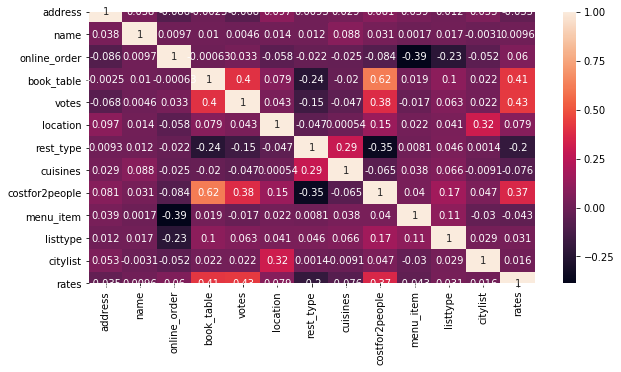

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

# Standarising the data to bring down the magnitude for ease of computation

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection import train_test_split


In [65]:
X=dataset1.drop(axis=1,columns=['rates','address', 'name','listtype','citylist'])

In [66]:
y=dataset1.rates

In [67]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,costfor2people,menu_item
0,1,0,13,71,78,2154,350.0,700
1,0,1,5015,45,33,1209,1800.0,7626
2,0,0,6,0,78,1580,250.0,7626
3,0,0,699,51,27,2615,1500.0,7626
4,1,0,129,48,14,1552,150.0,3027


In [68]:
#Dividing the data into training and test set

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=353)

In [70]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((37012, 8), (37012,), (4113, 8), (4113,))

In [71]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [72]:
X_test

array([[-1.20281249, -0.38460465, -0.32336881, ..., -1.48186544,
        -0.59041491,  0.46046208],
       [ 0.83138478,  2.60007257,  1.74365991, ...,  0.21359796,
         1.49067268,  0.46046208],
       [-1.20281249, -0.38460465, -0.32807463, ...,  1.37231999,
        -0.93726284,  0.46046208],
       ...,
       [-1.20281249, -0.38460465, -0.34101561, ...,  1.33236406,
        -0.127951  ,  0.46046208],
       [ 0.83138478, -0.38460465, -0.25513451, ...,  0.7809722 ,
        -0.35918295, -1.57910484],
       [ 0.83138478, -0.38460465, -0.31395718, ..., -0.26054577,
        -0.47479893, -2.21588802]])

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
regression=LinearRegression()

In [75]:
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred=regression.predict(X_test)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test,y_pred)

0.27645570736243297

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=353)

In [81]:
regressor2=DecisionTreeRegressor(min_samples_leaf=.0001)

In [82]:
regressor2.fit(X_train,y_train)
y_predict=regressor2.predict(X_test)

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_test,y_predict)

0.7721873141244119

In [85]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=0,min_samples_leaf=.0001)

In [86]:
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8058022256280383

# Hyper parameter tuning

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,100] 

In [89]:
params={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split}

In [90]:
random=RandomizedSearchCV(rf,params,n_iter=50,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [91]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25, total=   7.9s
[CV] n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25, total=   7.2s
[CV] n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25, total=   7.1s
[CV] n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25, total=   7.0s
[CV] n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, max_features=auto, max_depth=25, total=   7.0s
[CV] n_estimators=900, min_samples_split=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, max_features=sqrt, max_depth=20, total=  29.0s
[CV] n_estimators=900, min_samples_split=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, max_features=sqrt, max_depth=20, total=  28.4s
[CV] n_estimators=900, min_samples_split=2, max_features

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 138.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [94]:
random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [96]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=400,random_state=0,min_samples_leaf=.0001,min_samples_split=2,max_features='auto',max_depth=25)

In [99]:
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.0001, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [100]:
y_pred=RForest.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_test,y_pred)

0.8391525322899167

# With Hyper Parameter tuning i can able to get 83% accuracy